In [1]:
%cd ../data

/home/iseratho/repos/sicss-idea-6/data


In [2]:
import pandas as pd
from transformers import pipeline
import tqdm
tqdm.tqdm.pandas()

In [3]:
model_path = "cardiffnlp/twitter-roberta-base-emotion"
emotion_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
emotion_task("T'estimo!")

[{'label': 'optimism', 'score': 0.7387951612472534}]

In [4]:
tweets = pd.read_json("conversations_flat.json", lines=True)
tweets["text"] = tweets["text"].str.replace(r"http\S+", "")
tweets.head()

/tmp/ipykernel_30096/1172537589.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets["text"] = tweets["text"].str.replace(r"http\S+", "")


,text,public_metrics,in_reply_to_user_id,reply_settings,created_at,id,source,entities,referenced_tweets,context_annotations,author_id,possibly_sensitive,lang,conversation_id,author,in_reply_to_user,__twarc,attachments,geo,withheld
0,@RobinMillarMP @AlyAShields @BetsiCadwaladr @h...,"{'retweet_count': 2, 'reply_count': 0, 'like_c...",1194759472087998464,everyone,2020-10-09 12:17:15+00:00,1314540427874308096,Twitter for Android,"{'hashtags': [{'start': 220, 'end': 225, 'tag'...","[{'type': 'replied_to', 'id': '131449302570007...","[{'domain': {'id': '10', 'name': 'Person', 'de...",709375301583835136,False,en,1314477726678614016,{'description': 'Raising awareness for PANS Pa...,"{'entities': {'url': {'urls': [{'start': 0, 'e...",{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,NaN,NaN
1,@RobinMillarMP @BetsiCadwaladr @healthdpt @NIC...,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1194759472087998464,everyone,2020-10-09 11:49:31+00:00,1314533448405614592,Twitter for Android,"{'annotations': [{'start': 136, 'end': 140, 'p...","[{'type': 'replied_to', 'id': '131449302570007...","[{'domain': {'id': '10', 'name': 'Person', 'de...",470801601,False,en,1314477726678614016,{'entities': {'description': {'urls': [{'start...,"{'entities': {'url': {'urls': [{'start': 0, 'e...",{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,NaN,NaN
2,@RobinMillarMP @AlyAShields @BetsiCadwaladr @h...,"{'retweet_count': 4, 'reply_count': 0, 'like_c...",1194759472087998464,everyone,2020-10-09 10:12:43+00:00,1314509086596239360,Twitter for iPhone,"{'annotations': [{'start': 255, 'end': 258, 'p...","[{'type': 'replied_to', 'id': '131449302570007...","[{'domain': {'id': '10', 'name': 'Person', 'de...",816444807371517952,False,en,1314477726678614016,"{'entities': {'url': {'urls': [{'start': 0, 'e...","{'entities': {'url': {'urls': [{'start': 0, 'e...",{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,NaN,NaN
3,@AlyAShields @BetsiCadwaladr @healthdpt @NICEC...,"{'retweet_count': 8, 'reply_count': 3, 'like_c...",470801601,everyone,2020-10-09 09:08:54+00:00,1314493025700077568,Twitter for Android,"{'mentions': [{'start': 0, 'end': 12, 'usernam...","[{'type': 'replied_to', 'id': '131447772937129...","[{'domain': {'id': '10', 'name': 'Person', 'de...",1194759472087998464,False,en,1314477726678614016,"{'entities': {'url': {'urls': [{'start': 0, 'e...",{'entities': {'description': {'urls': [{'start...,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,NaN,NaN
4,@BetsiCadwaladr @CALL_247 @MindCymru @Research...,"{'retweet_count': 4, 'reply_count': 1, 'like_c...",470801601,everyone,2020-10-09 08:08:07+00:00,1314477729371299840,Twitter for Android,"{'mentions': [{'start': 0, 'end': 15, 'usernam...","[{'type': 'replied_to', 'id': '131447772667861...","[{'domain': {'id': '10', 'name': 'Person', 'de...",470801601,False,qam,1314477726678614016,{'entities': {'description': {'urls': [{'start...,{'entities': {'description': {'urls': [{'start...,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,NaN,NaN


In [5]:
def get_emotion(x):
    return emotion_task(x)[0]['label']

tweets["emotion"] = tweets["text"].progress_map(get_emotion)

100%|███████████████████████████████████████████████████████████████████████████| 52302/52302 [2:28:32<00:00,  5.87it/s]


In [6]:
tweets = tweets.set_index("id")
tweets["emotion"].to_csv("tweet_emotion.csv")

In [7]:
tweets["emotion"].value_counts()

joy         27810
optimism    10701
sadness      9101
anger        4690
Name: emotion, dtype: int64

In [8]:
# def split_label(x):
#     print(x)
#     if x <= "2020-01-01 00:00:00+00:00":
#         return "before"
#     elif x > "2020-01-01 00:00:00+00:00" and x < "2020-01-01 00:00:00+00:00":
#         return "first_wave"
#     elif x >= "2020-09-01 00:00:00+00:00":
#         return "after_first"

tweets["split"] = "after_first"
tweets.loc[(tweets["created_at"] < "2020-09-01 00:00:00+00:00"), "split"] = "first_wave"
tweets.loc[(tweets["created_at"] < "2020-01-01 00:00:00+00:00"), "split"] = "before"
# tweets["split"] = "N/A"
# tweets["split"] = tweets["created_at"] <= "2020-01-01 00:00:00+00:00"
# tweets["split"] = tweets["created_at"].map(split_label)
tweets["split"].value_counts()

after_first    46964
first_wave      4466
before           872
Name: split, dtype: int64

<AxesSubplot:xlabel='split', ylabel='count'>

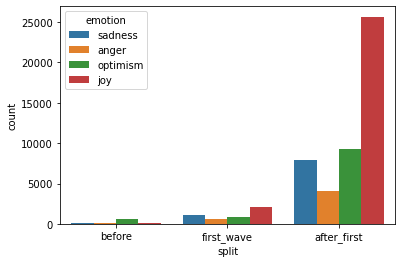

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=tweets, x="split", hue="emotion", order=["before", "first_wave", "after_first"])

In [10]:
tweets.groupby("split")["emotion"].value_counts(normalize=True)

split        emotion 
after_first  joy         0.546248
             optimism    0.197726
             sadness     0.169364
             anger       0.086662
before       optimism    0.666284
             joy         0.131881
             sadness     0.122706
             anger       0.079128
first_wave   joy         0.457009
             sadness     0.232871
             optimism    0.186744
             anger       0.123377
Name: emotion, dtype: float64

In [11]:
reshaped = tweets.groupby("split")["emotion"].value_counts(normalize=True).rename("percent").reset_index()
reshaped

,split,emotion,percent
0,after_first,joy,0.546248
1,after_first,optimism,0.197726
2,after_first,sadness,0.169364
3,after_first,anger,0.086662
4,before,optimism,0.666284
5,before,joy,0.131881
6,before,sadness,0.122706
7,before,anger,0.079128
8,first_wave,joy,0.457009
9,first_wave,sadness,0.232871


<AxesSubplot:xlabel='split', ylabel='percent'>

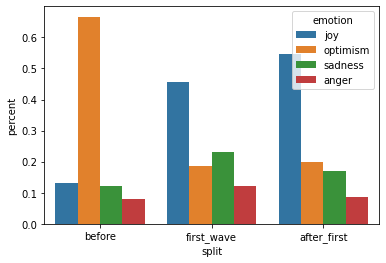

In [12]:
sns.barplot(data=reshaped, x="split", y="percent", hue="emotion", 
            order=["before", "first_wave", "after_first"])

In [13]:
grouped = tweets.set_index("created_at").sort_index().groupby("emotion").rolling("30D").count().div(30)["text"]
grouped#.plot()

emotion  created_at               
anger    2019-10-10 14:33:20+00:00    0.033333
         2019-10-10 14:33:20+00:00    0.066667
         2019-10-10 15:26:38+00:00    0.100000
         2019-10-10 15:26:38+00:00    0.133333
         2019-10-10 22:42:58+00:00    0.166667
                                        ...   
sadness  2022-07-23 08:46:04+00:00    8.166667
         2022-07-23 09:17:00+00:00    8.200000
         2022-07-23 19:33:21+00:00    8.100000
         2022-07-24 08:33:48+00:00    8.100000
         2022-07-26 05:59:29+00:00    8.033333
Name: text, Length: 52302, dtype: float64

<AxesSubplot:xlabel='created_at'>

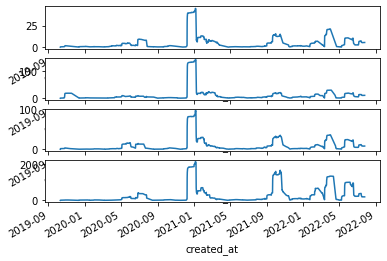

In [14]:
f, a = plt.subplots(4,1)
grouped.xs('anger').plot(ax=a[0])
grouped.xs('optimism').plot(ax=a[1])
grouped.xs('sadness').plot(ax=a[2])
grouped.xs('joy').plot(ax=a[3])

# Findings

Increase in joy is noteworthy, but hard to explain.
Maybe irony results could provide answers.  
Decrease in sadness is consistent with policitians, but anger and optmisim is different as well.  